In [31]:
import phylonetwork
import matplotlib
import networkx
import pygraphviz
%matplotlib inline
from itertools import product, permutations

In [32]:
from networkx.drawing.nx_agraph import graphviz_layout

In [33]:
def split(net,u):
    utilde = net._generate_new_id()
    for e in net.in_edges(u):
        net.add_edge(e[0],utilde)
        net.remove_edge(e[0],u)
    net.add_edge(utilde,u)
    return utilde

In [34]:
def augmentation_T(net,ell,wt,vts):
    netb = net.copy()
    netb.cache = {}
    r = len(vts) + 1
    us = [netb._generate_new_id() for _ in range(r)]
    netb.add_path(us)
    netb._labels[us[-1]]=ell
    w = split(netb,wt)
    netb.add_edge(w,us[0])
    for i in range(r-1):
        u = us[i]
        v = split(netb,vts[i])
        netb.add_edge(u,v)
    if networkx.is_directed_acyclic_graph(netb):
        return netb
    else:
        return None

In [120]:
def augmentation_H(net,ell,wt1,wt2,vts):
    netb = net.copy()
    netb.cache = {}
    rt = len(vts)+2
    us = [netb._generate_new_id() for _ in range(rt)]
    netb.add_path(us)
    netb._labels[us[-1]]=ell
    w1 = split(netb,wt1)
    netb.add_edge(w1,us[0])
    w2 = split(netb,wt2)
    netb.add_edge(w2,us[0])
    for i in range(1,rt-1):
        u = us[i]
        v = split(netb,vts[i-1])
        netb.add_edge(u,v)
    if networkx.is_directed_acyclic_graph(netb):
        return netb
    else:
        return None

In [161]:
def find_augmentations(net,ell):
    nets = []
    nodes = net.nodes()
    tree_nodes = [u for u in nodes if net.is_tree_node(u)]
    num_tree_nodes = len(tree_nodes)
    for r in range(num_tree_nodes+1):
        for (wt,vts) in product(tree_nodes,permutations(tree_nodes,r)):
            netb = augmentation_T(net,ell,wt,vts)
            if netb:
                # print(wt,vts)
                nets.append(netb)
        for wv in permutations(tree_nodes,r+2):
            w1t = wv[0]
            w2t = wv[1]
            if w1t > w2t: continue
            vts = wv[2:]
            netb = augmentation_H(net,ell,w1t,w2t,vts)
            if netb:
                # print(w1t,w2t,vts)
                nets.append(netb)
        for wv in permutations(tree_nodes,r+1):
            w1t = wv[0]
            w2t = wv[0]
            vts = wv[1:]
            netb = augmentation_H(net,ell,w1t,w2t,vts)
            if netb:
                # print(w1t,w2t,vts)
                nets.append(netb)
    return nets

In [159]:
def find_networks(taxa):
    if len(taxa)==1:
        return [phylonetwork.PhyloNetwork(eNewick=taxa[0]+';')]
    nets = []
    for net in find_networks(taxa[:-1]):
        nets.extend(find_augmentations(net,taxa[-1]))
        print(len(nets))
    return nets

In [130]:
def draw(net):
    pos = graphviz_layout(net,prog='dot')
    networkx.draw_networkx(net,pos,labels=net._labels)

In [103]:
t = phylonetwork.PhyloNetwork(eNewick="(1,2);")

In [77]:
t3 = find_augmentations(t,'3')

_1 ()
_2 ()
_3 ()
_1 _2 ()
_1 _3 ()
_2 _1 ()
_2 _3 ()
_3 _1 ()
_3 _2 ()
_1 ('_1',)
_1 ('_2',)
_1 ('_3',)
_2 ('_2',)
_2 ('_3',)
_3 ('_2',)
_3 ('_3',)
_1 _2 ('_3',)
_1 _3 ('_2',)
_2 _1 ('_3',)
_2 _3 ('_1',)
_3 _1 ('_2',)
_3 _2 ('_1',)
_1 ('_1', '_2')
_1 ('_1', '_3')
_1 ('_2', '_1')
_1 ('_2', '_3')
_1 ('_3', '_1')
_1 ('_3', '_2')
_2 ('_2', '_3')
_2 ('_3', '_2')
_3 ('_2', '_3')
_3 ('_3', '_2')


In [73]:
draw(t3[20])

IndexError: list index out of range

In [104]:
t1=phylonetwork.PhyloNetwork(eNewick='1;')

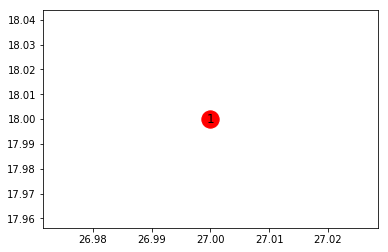

In [105]:
draw(t1)

In [106]:
t2=find_augmentations(t1,'2')

_1 ()
_1 _1 ()
_1 ('_1',)


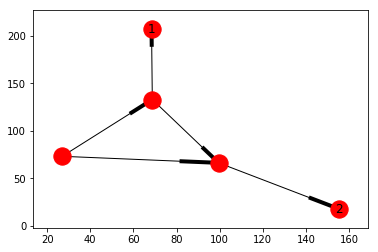

In [107]:
draw(t2[1])

/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


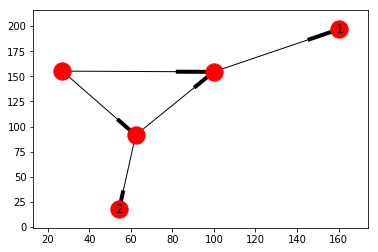

In [88]:
draw(augmentation_T(t1,'2','_1',['_1']))

In [97]:
t

Phylogenetic Network with taxa [1,2].

/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


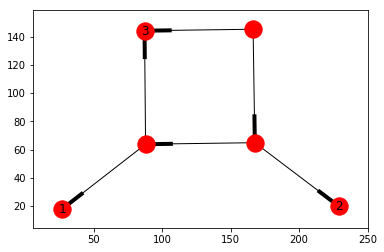

In [99]:
draw(augmentation_H(t,'3','_1','_2',[]))

In [109]:
l[:-1]

[1, 2, 3]

In [156]:
for net in find_networks(['1','2','3']):
    print(net)

_1 ()
_1 _1 ()
_1 ('_1',)
_1 ()
_3 ()
_2 ()
_1 _3 ()
_1 _2 ()
_2 _3 ()
_1 _1 ()
_3 _3 ()
_2 _2 ()
_1 ('_1',)
_1 ('_2',)
_3 ('_1',)
_3 ('_3',)
_3 ('_2',)
_2 ('_1',)
_2 ('_2',)
_1 _3 ('_2',)
_2 _3 ('_1',)
_1 _1 ('_2',)
_3 _3 ('_1',)
_3 _3 ('_2',)
_2 _2 ('_1',)
_1 ('_1', '_2')
_1 ('_2', '_1')
_3 ('_1', '_3')
_3 ('_1', '_2')
_3 ('_3', '_1')
_3 ('_3', '_2')
_3 ('_2', '_1')
_3 ('_2', '_3')
_2 ('_1', '_2')
_2 ('_2', '_1')
_3 _3 ('_1', '_2')
_3 _3 ('_2', '_1')
_3 ('_1', '_3', '_2')
_3 ('_1', '_2', '_3')
_3 ('_3', '_1', '_2')
_3 ('_3', '_2', '_1')
_3 ('_2', '_1', '_3')
_3 ('_2', '_3', '_1')
_1 ()
_3 ()
_4 ()
_5 ()
_1 _3 ()
_1 _4 ()
_1 _5 ()
_3 _4 ()
_3 _5 ()
_4 _5 ()
_1 _1 ()
_3 _3 ()
_4 _4 ()
_5 _5 ()
_1 ('_1',)
_1 ('_3',)
_3 ('_1',)
_3 ('_3',)
_4 ('_1',)
_4 ('_3',)
_4 ('_4',)
_4 ('_5',)
_5 ('_1',)
_5 ('_3',)
_5 ('_5',)
_1 _4 ('_3',)
_1 _5 ('_3',)
_3 _4 ('_1',)
_3 _5 ('_1',)
_4 _5 ('_1',)
_4 _5 ('_3',)
_1 _1 ('_3',)
_3 _3 ('_1',)
_4 _4 ('_1',)
_4 _4 ('_3',)
_4 _4 ('_5',)
_5 _5 ('_1',)
_5 _5 ('

In [162]:
N1=find_networks(['1'])
N2=find_networks(['1','2'])
N3=find_networks(['1','2','3'])
N4=find_networks(['1','2','3','4'])

3
3
40
170
300
3
40
170
300
658
1316
1974
5022
8511
11559
14966
18014
21421
24828
27876
31365
34413
37902
40950
44357
63495
82633
101771
121410
141049
160187
179325
198463
217601
239393
259032
278671
300463
319601
338739
357877
505681


KeyboardInterrupt: 

In [128]:
len(N1)
len(N2)
len(N3)

333

In [158]:
print(len(N1))
print(len(N2))
print(len(N3))
print(len(N4))

1
3
300


NameError: name 'N4' is not defined

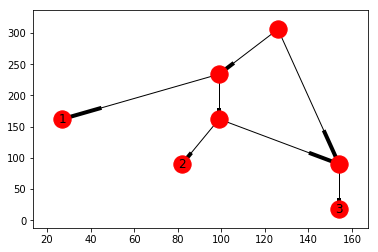

In [151]:
draw(N3[8])

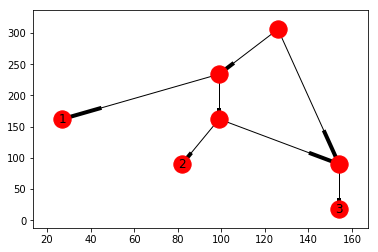

In [152]:
draw(N3[6])